In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Control warnings
import warnings; warnings.simplefilter('ignore')

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import torch
import anndata

import plotly.express as px
import plotly.graph_objects as go

import plotly.express as px
import plotly.graph_objects as go
from anndata import AnnData
from umap import UMAP
from fastTSNE import TSNE
import plotnine as p
import datetime 
from fastTSNE.callbacks import ErrorLogger

import scvi
scvi.__version__

'0.7.0a6'

In [2]:
adata = anndata.read('allard_unfiltered_nuclei.h5ad')


In [3]:
adata=adata[(adata.X.sum(1) > 2000)].copy()
adata

AnnData object with n_obs × n_vars = 21941 × 20191
    obs: 'shortname', 'experiment_id', 'experiment_type', 'control', 'fastq_folder', 'barcode'
    var: 'gene_id', 'gene_name'

 ======================== x01_control ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10449.81it/s]
 ======================== x02_control ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10174.60it/s]
 ======================== x03_ethanol005 ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10725.67it/s]
 ======================== x04_water ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10556.20it/s]
 ======================== x05_ethanol005 ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10170.32it/s]
 ======================== x06_water ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:02<00:00, 9644.55it/s] 
 ======================== x07_ethanol05 ==============================
Sampling 

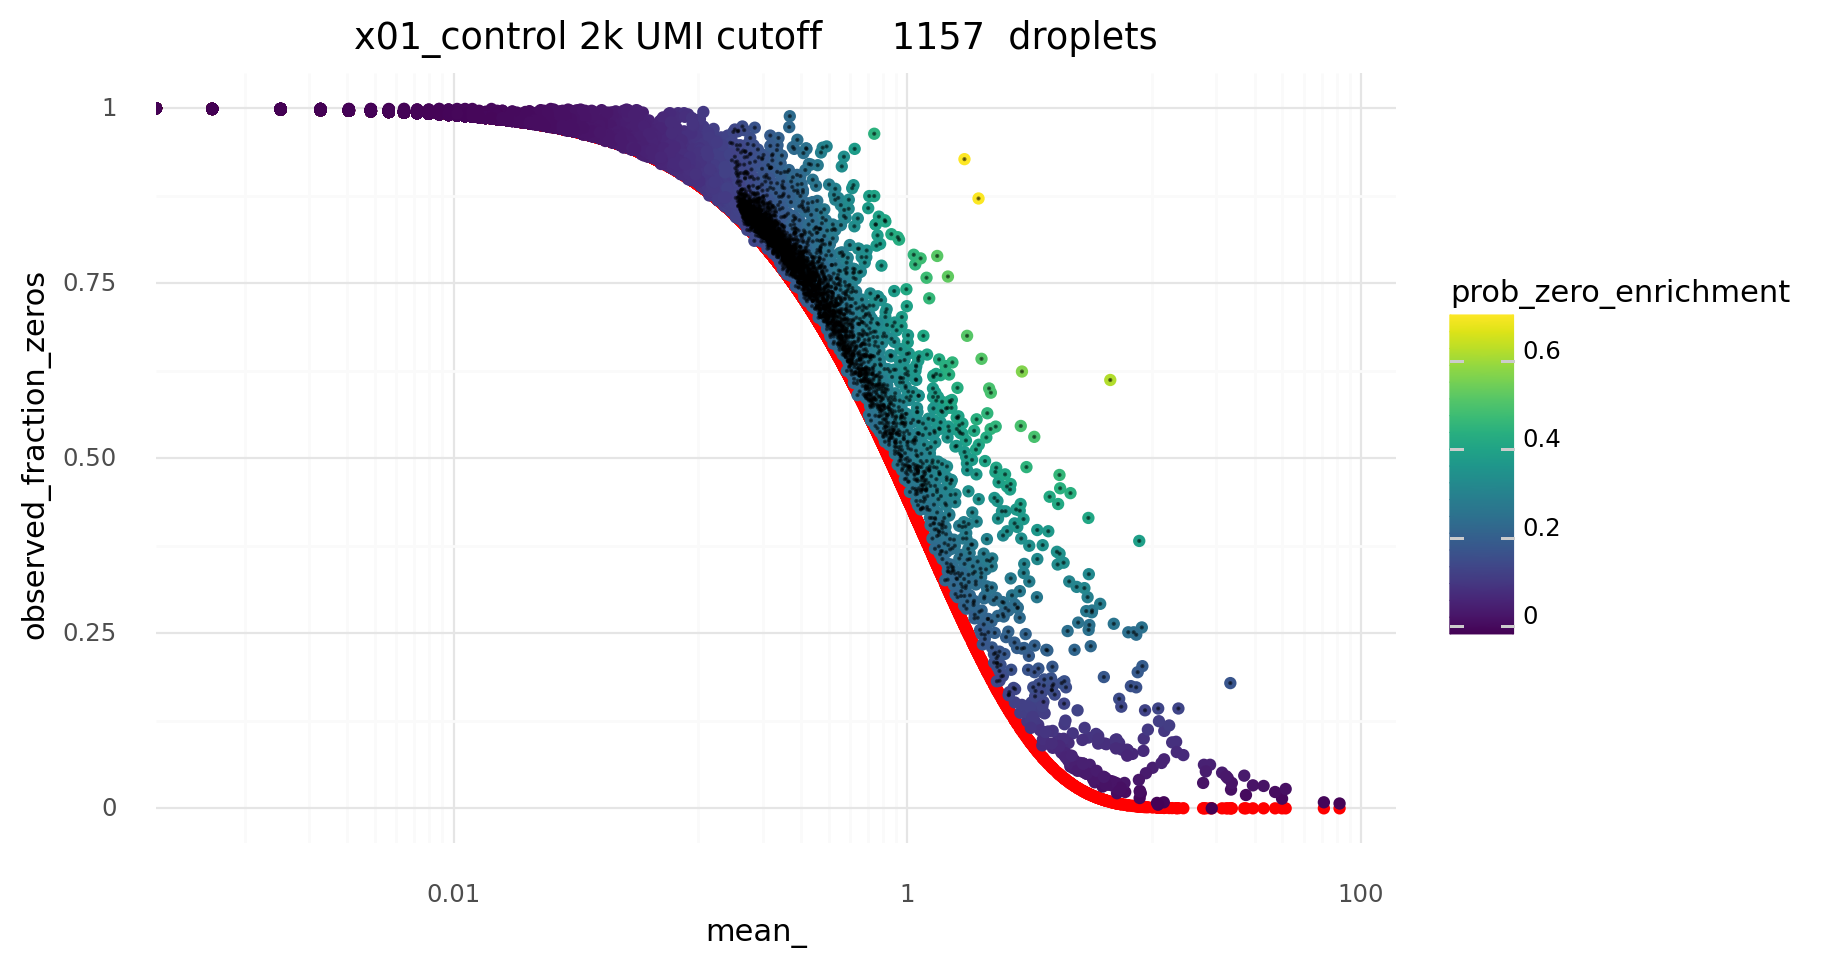

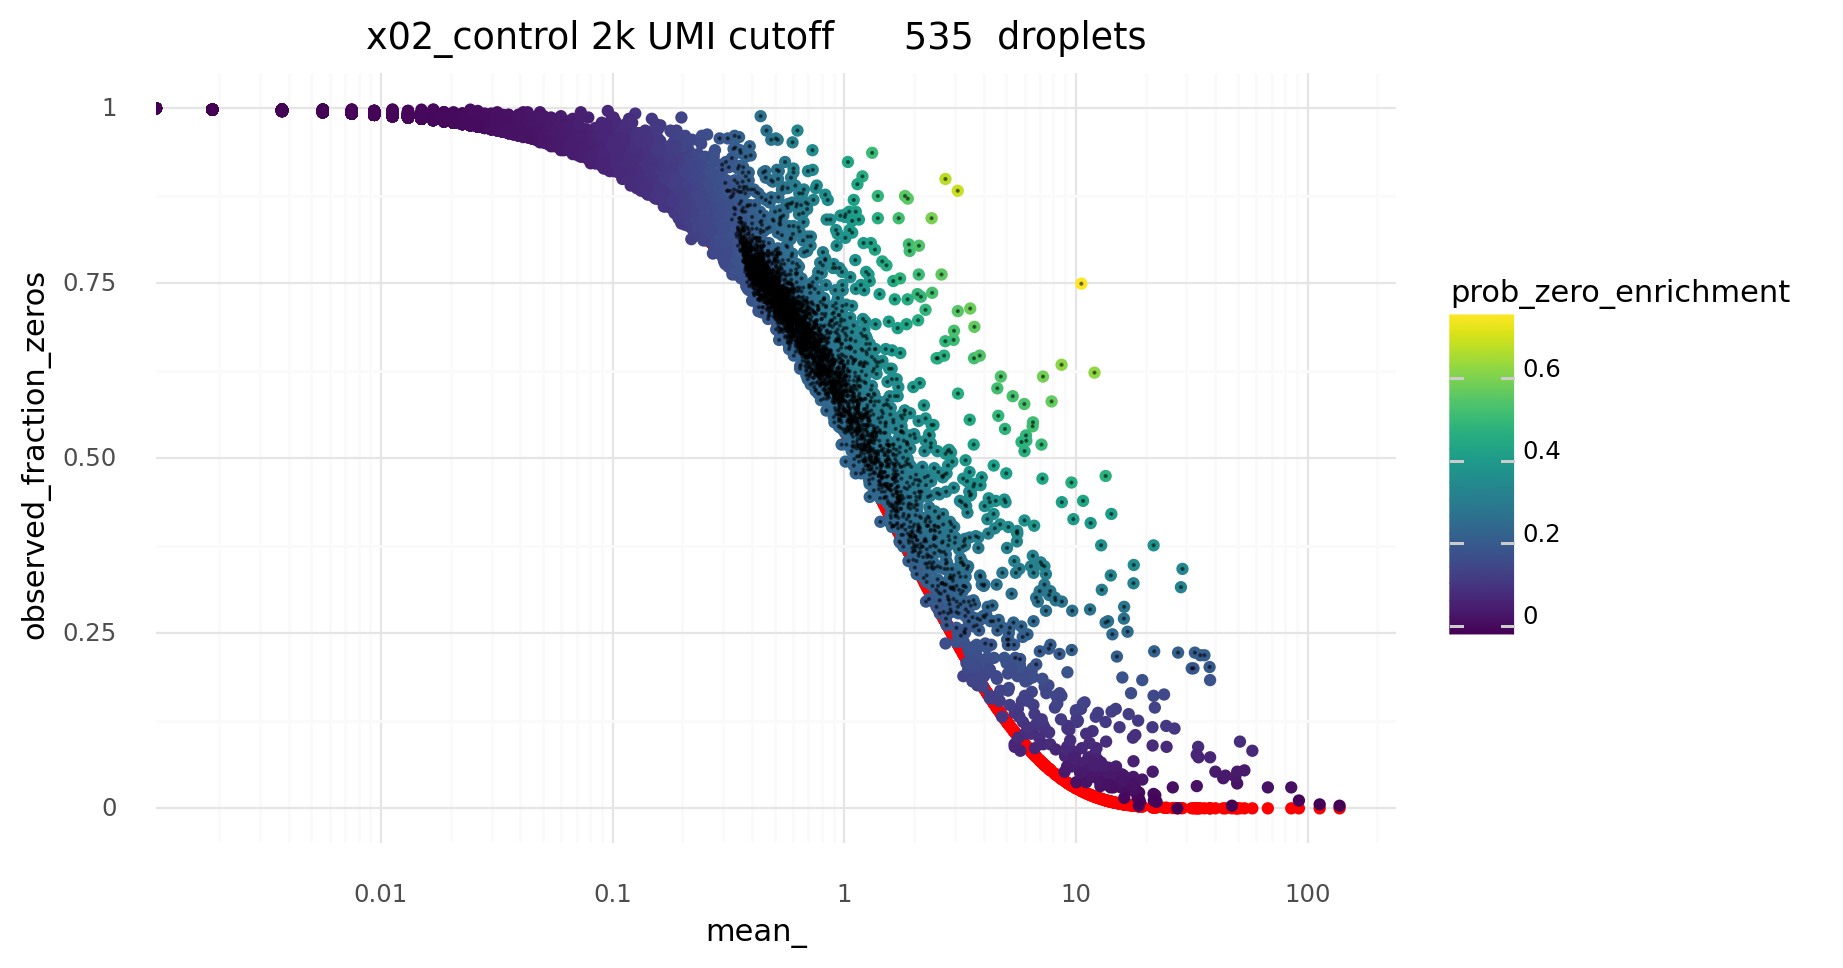

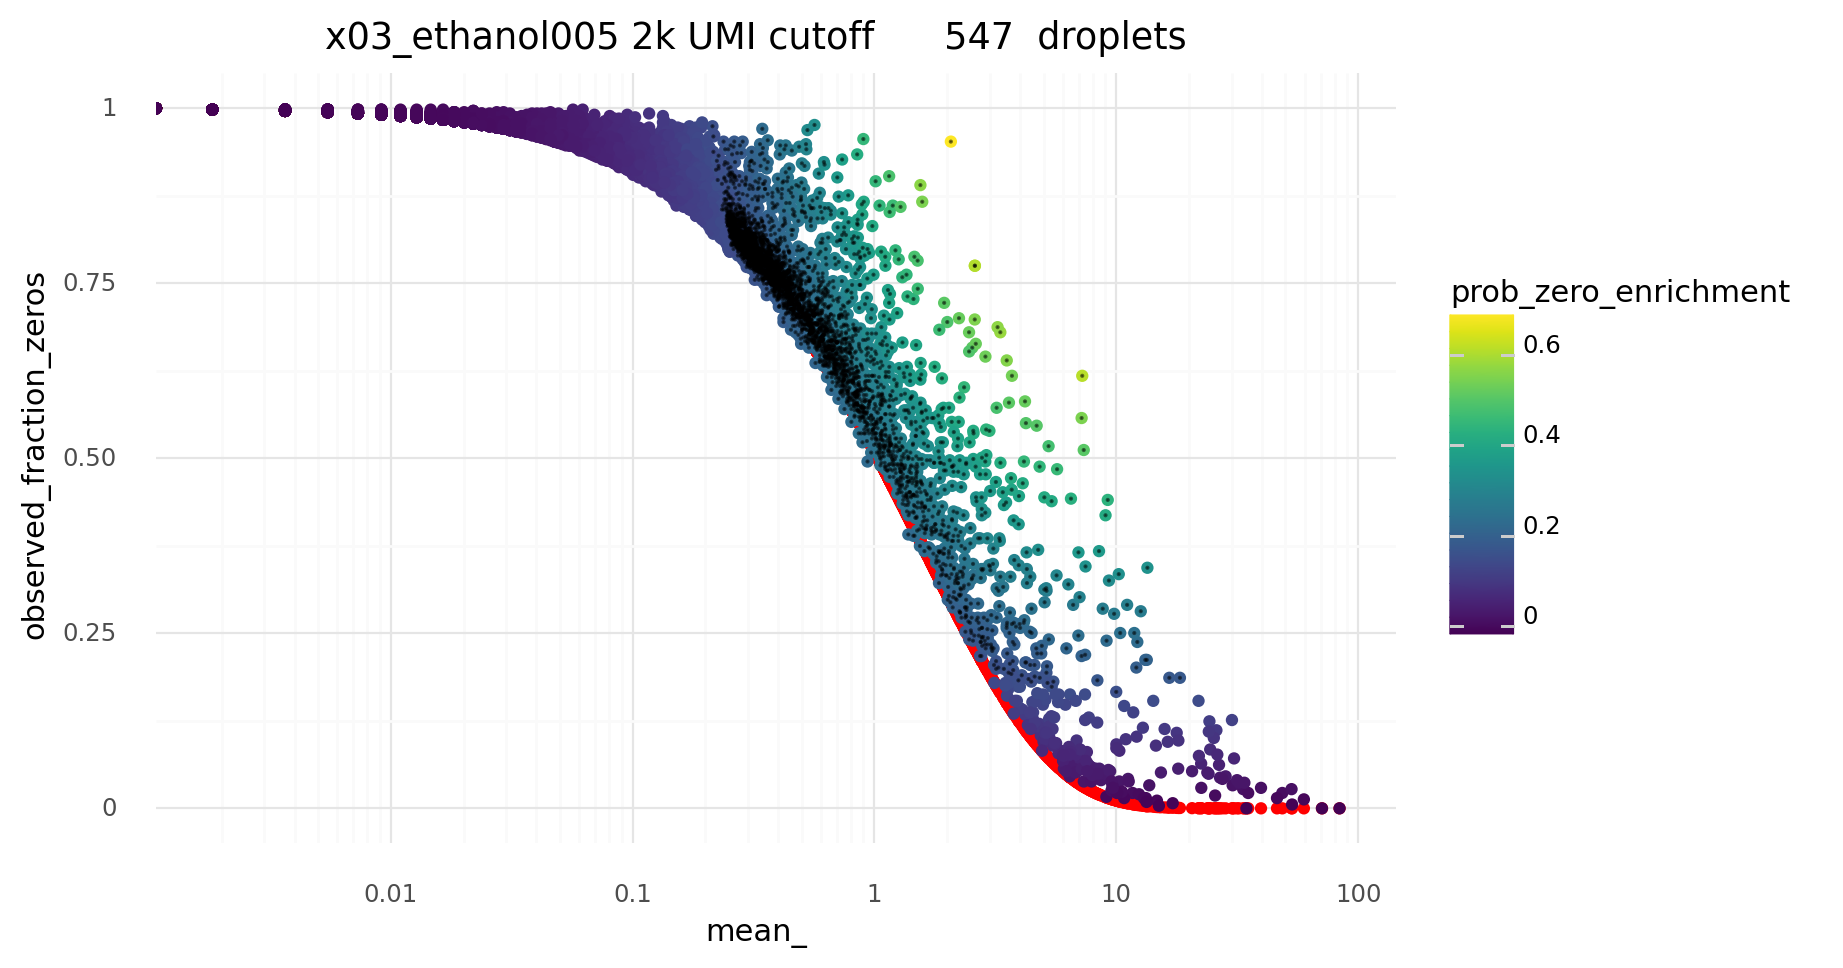

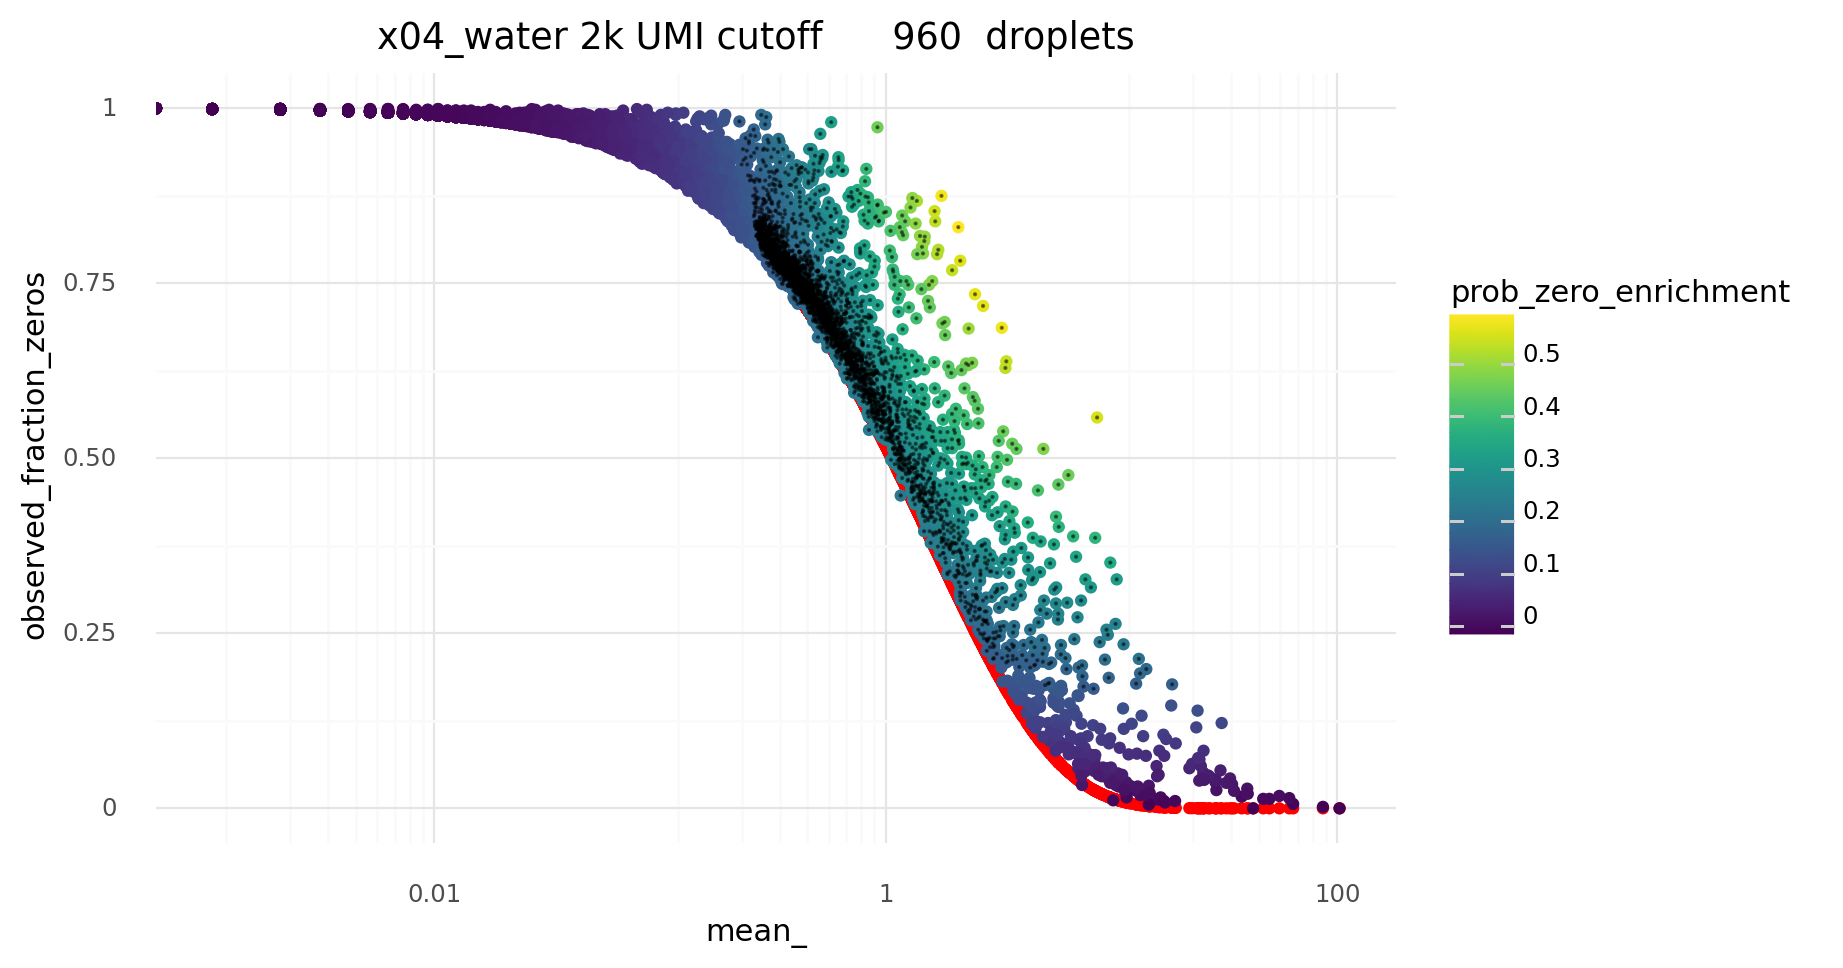

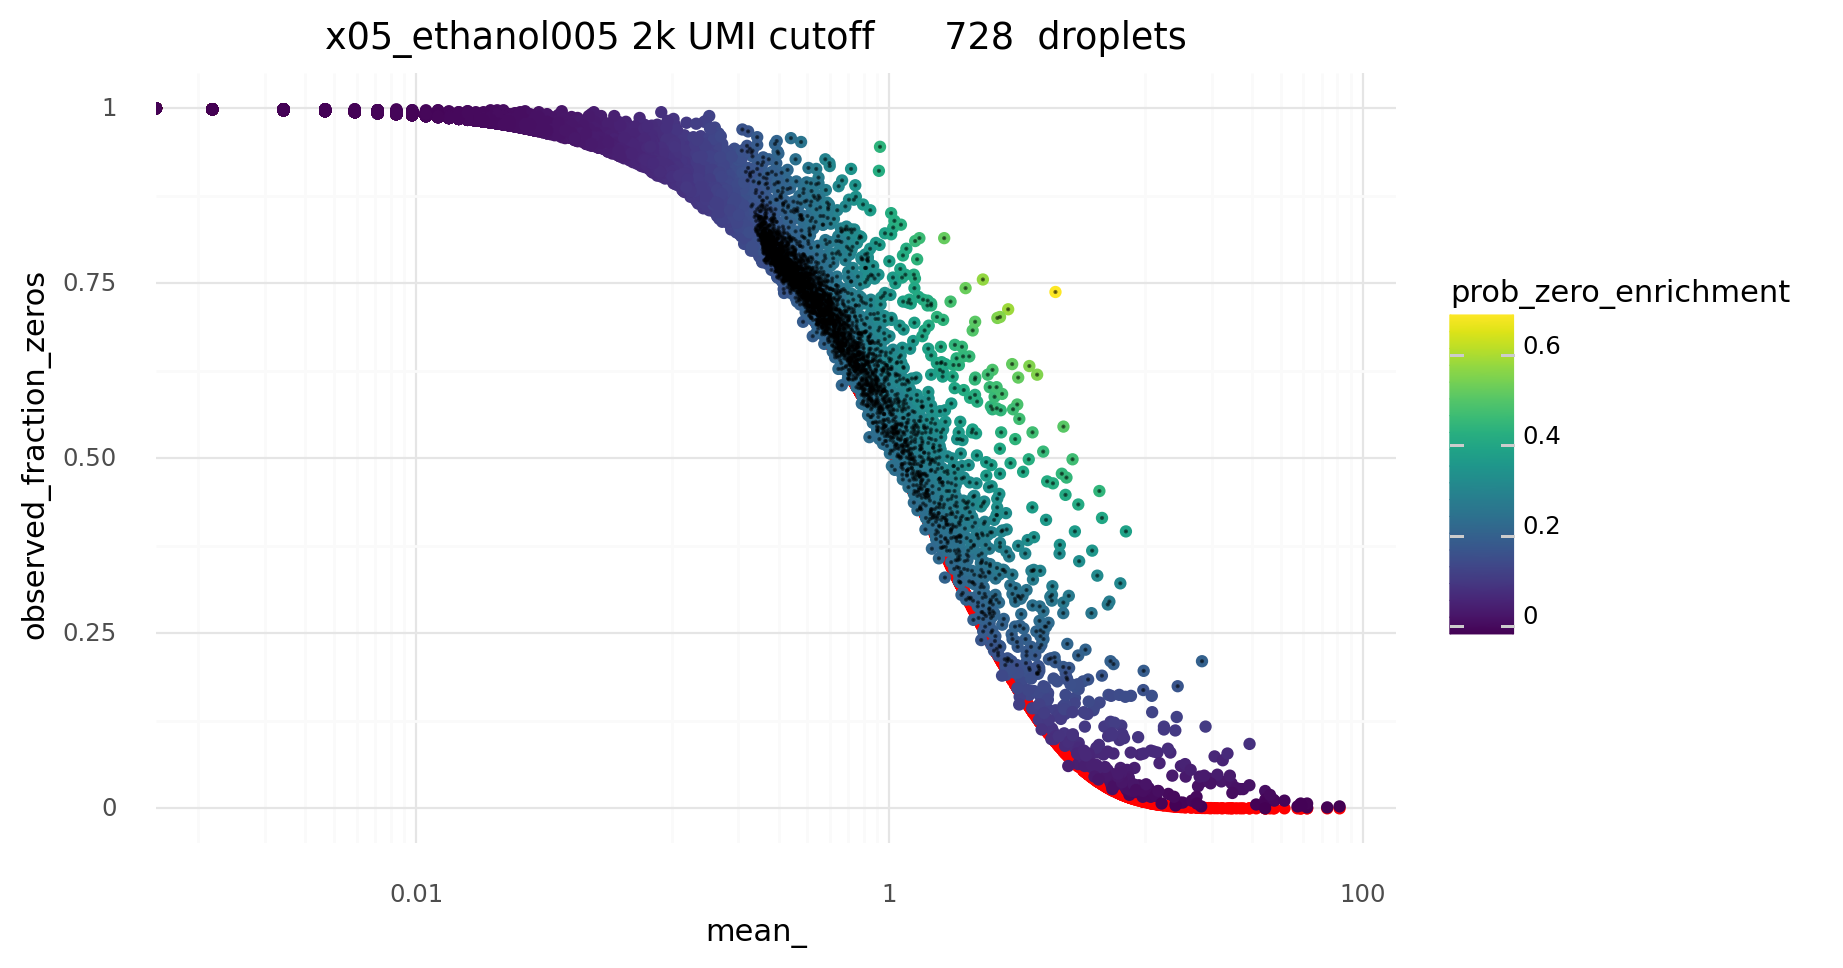

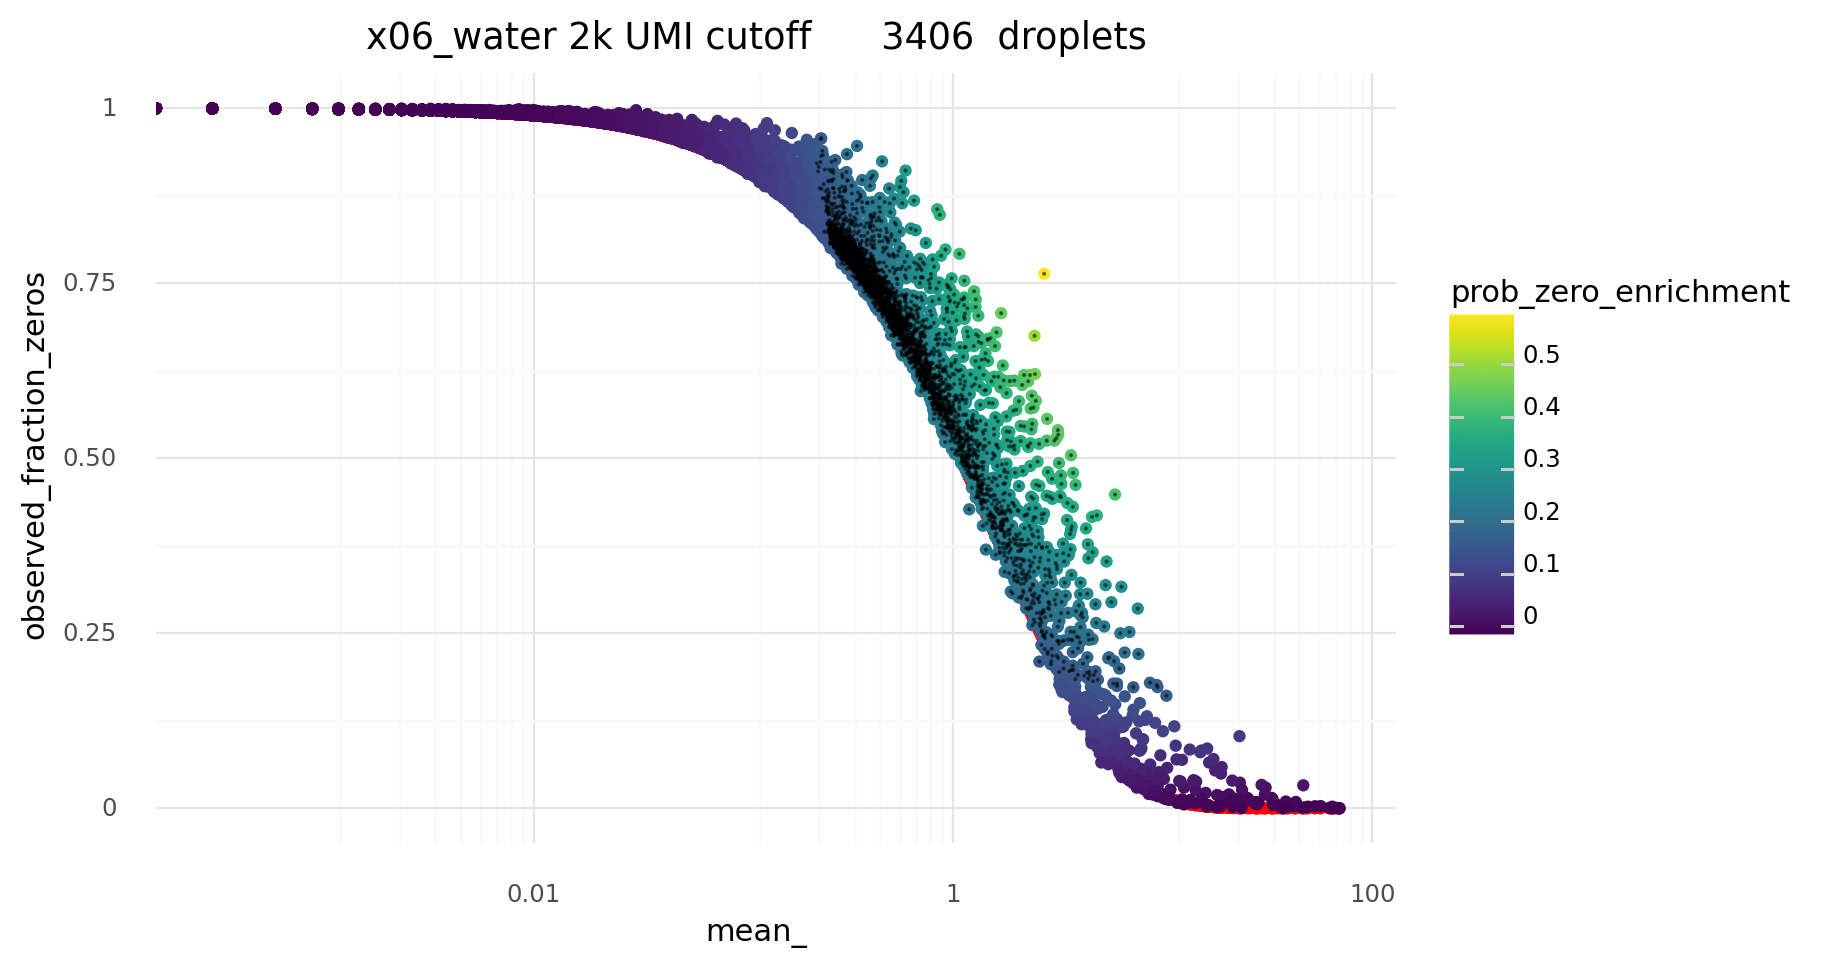

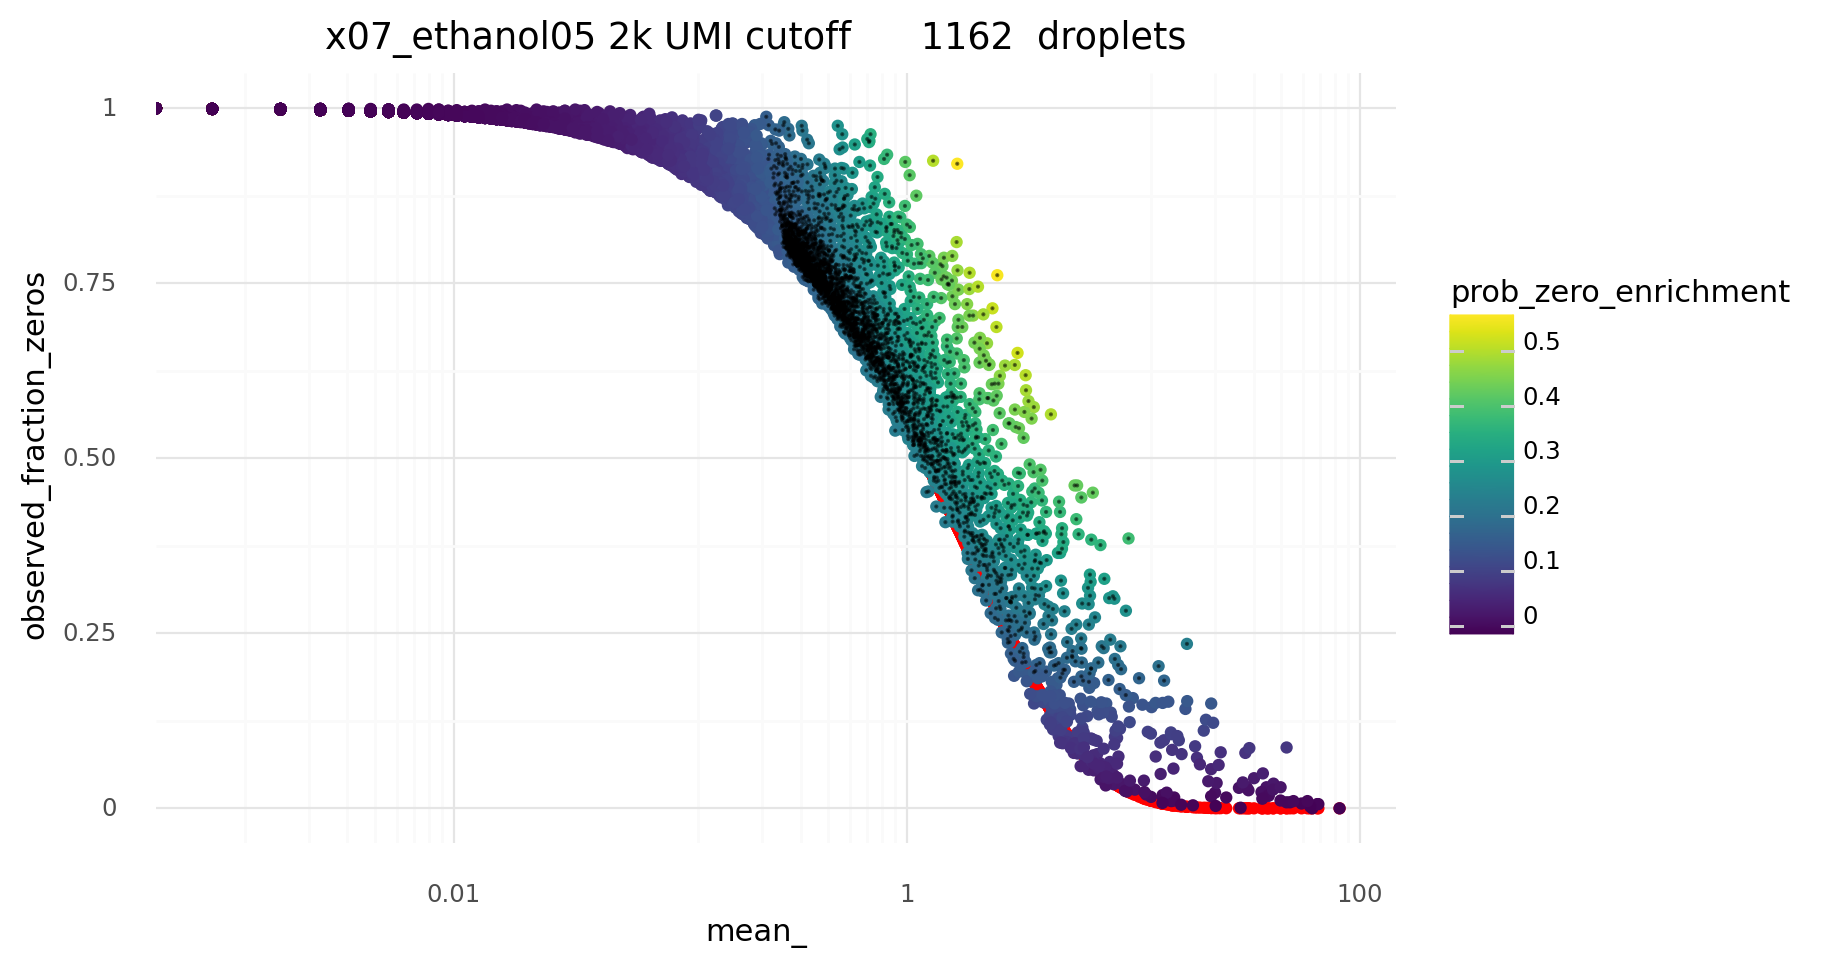

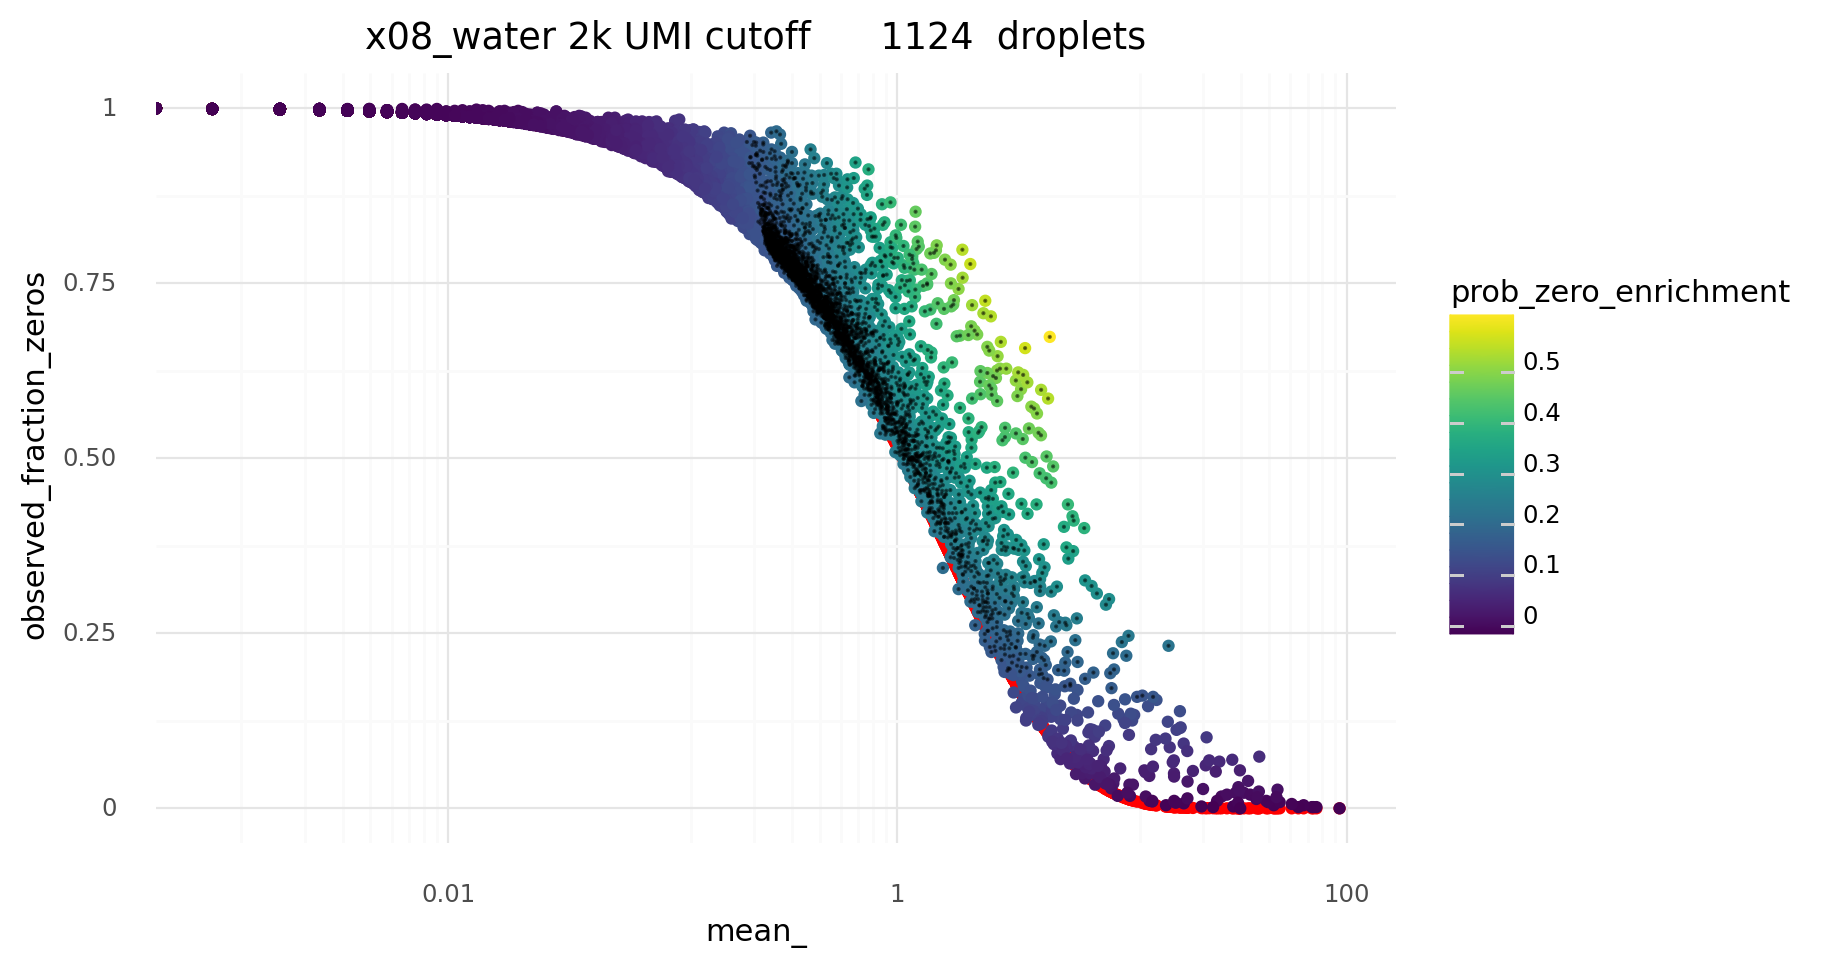

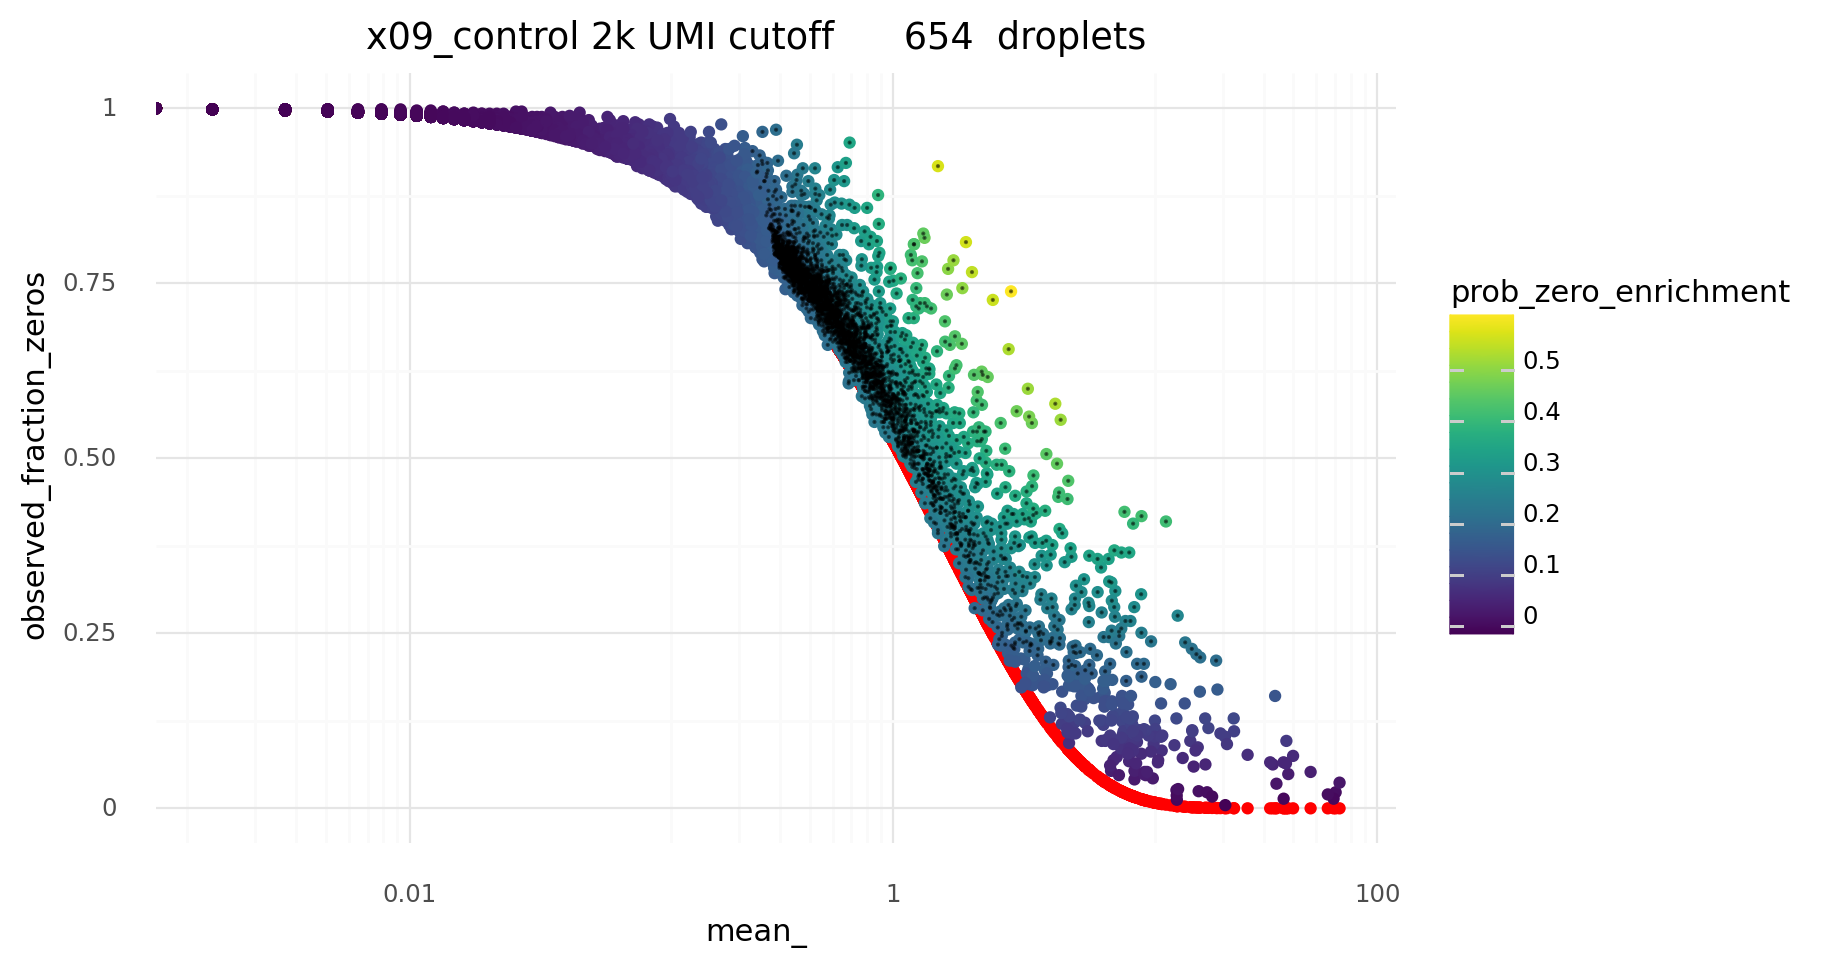

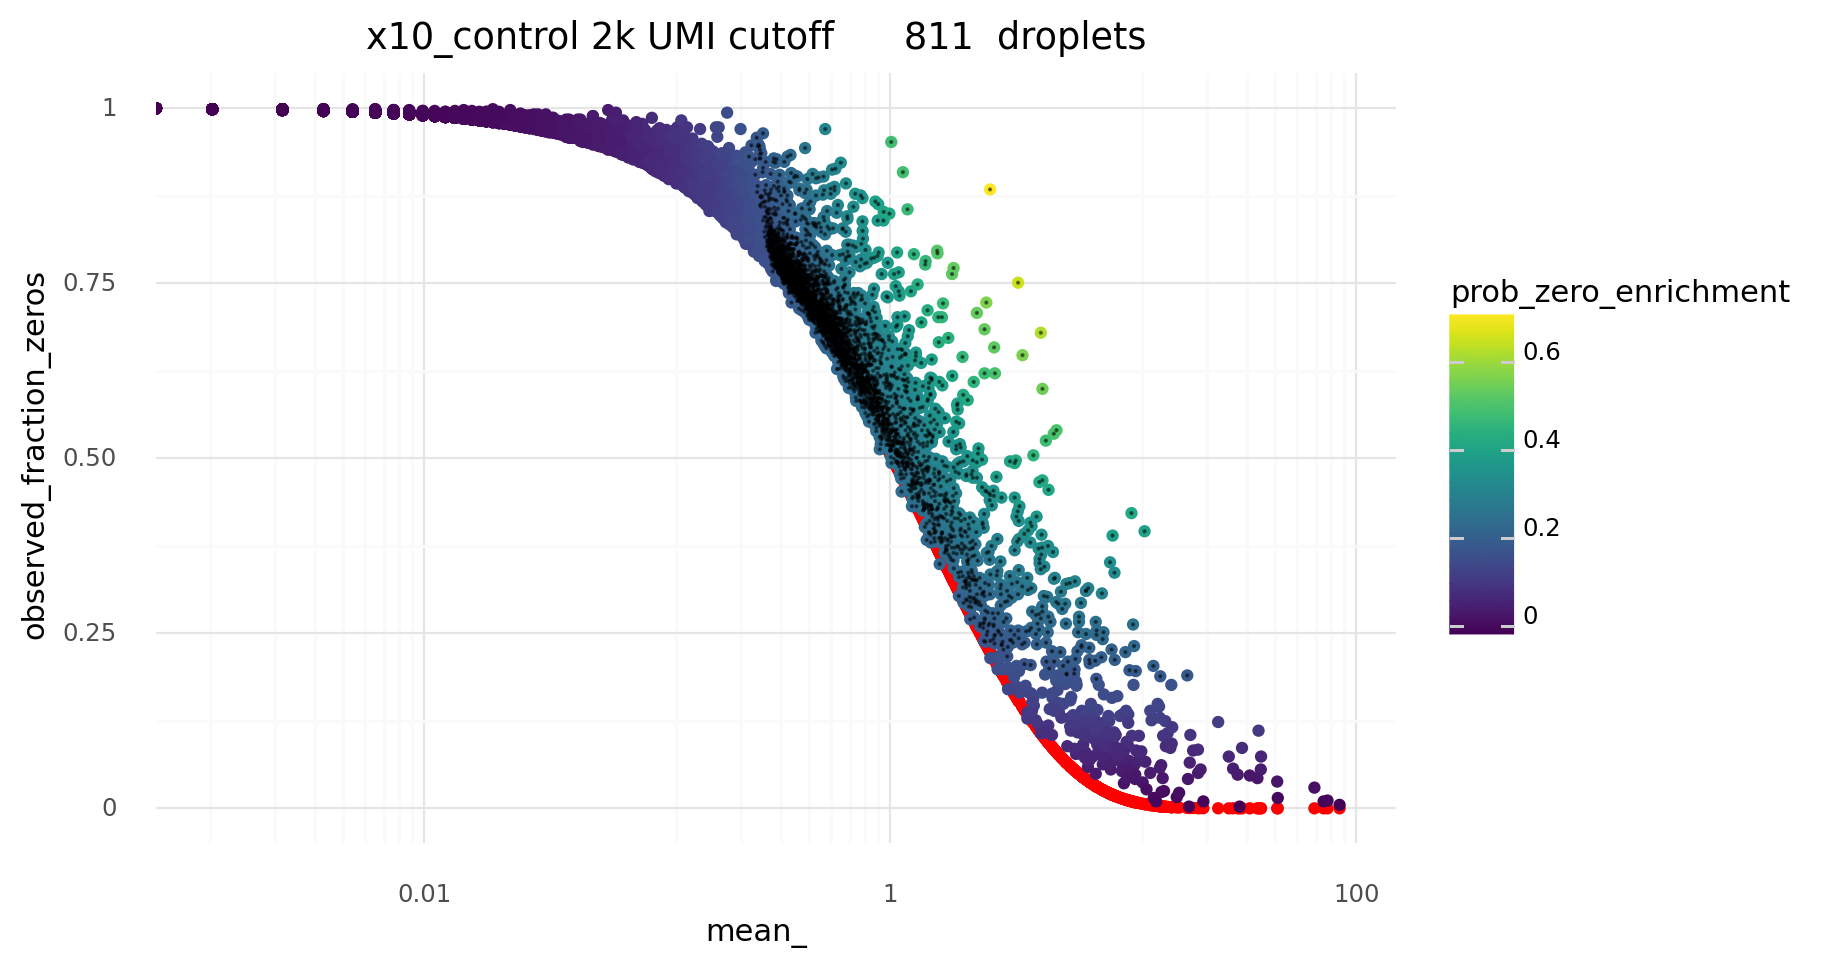

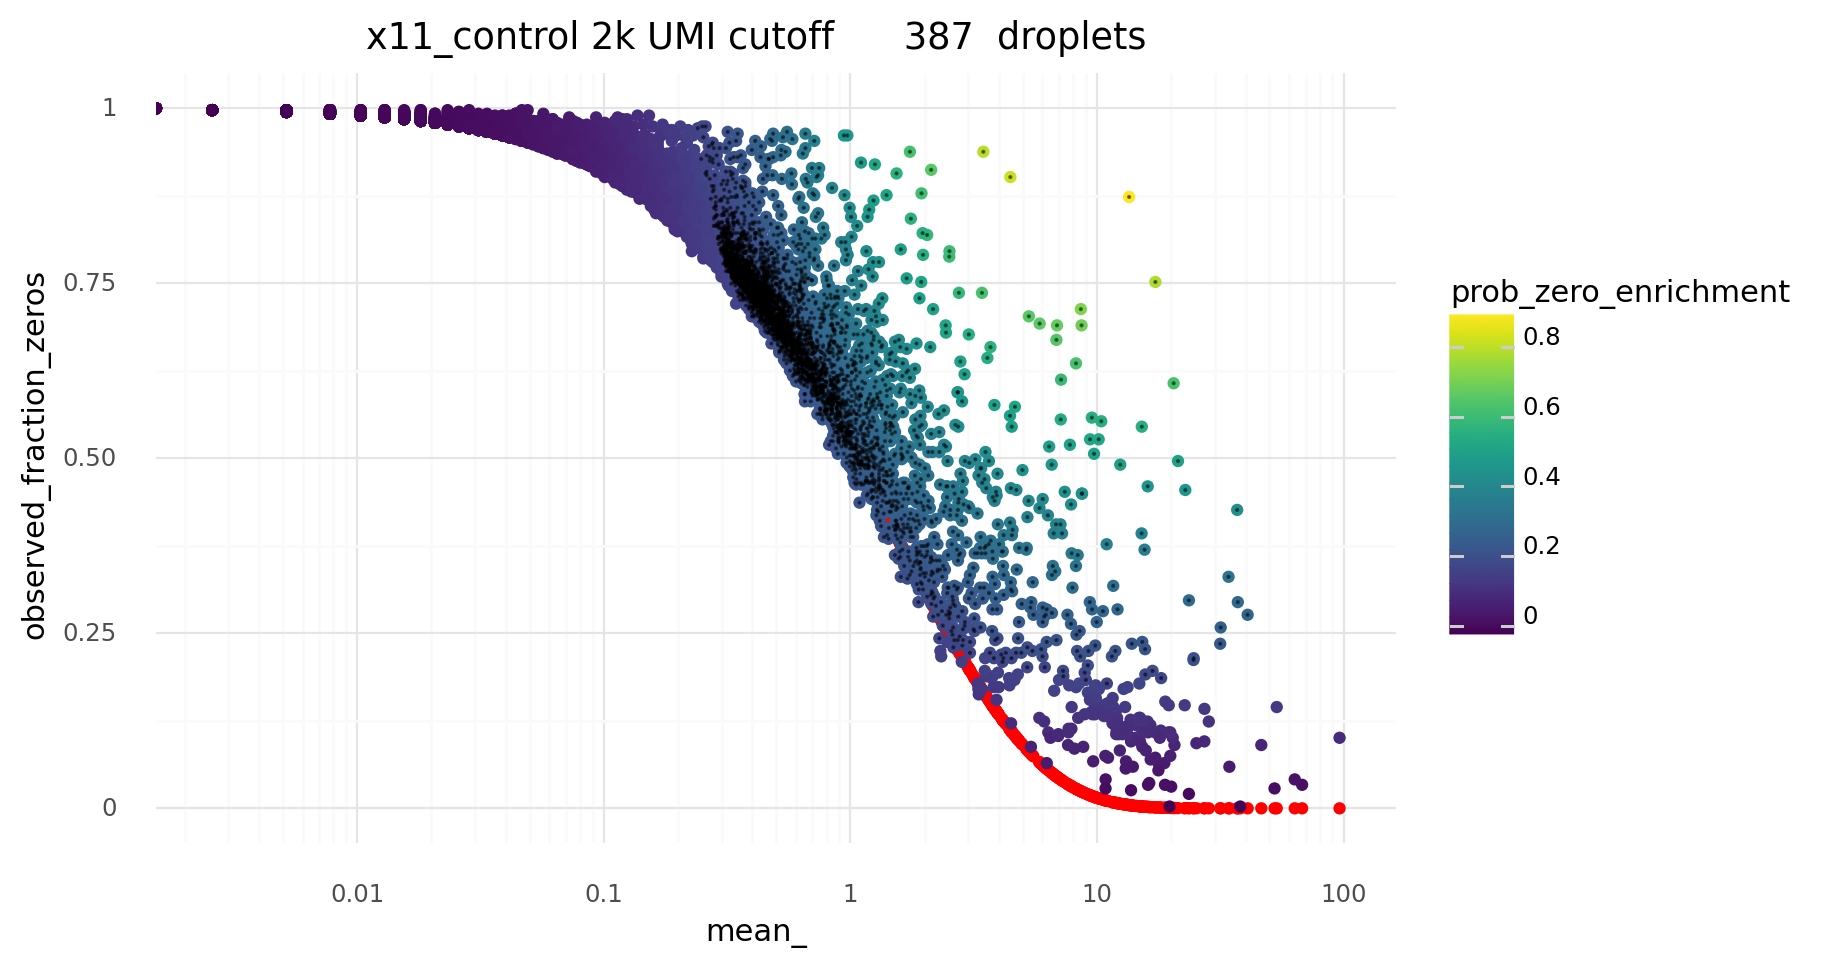

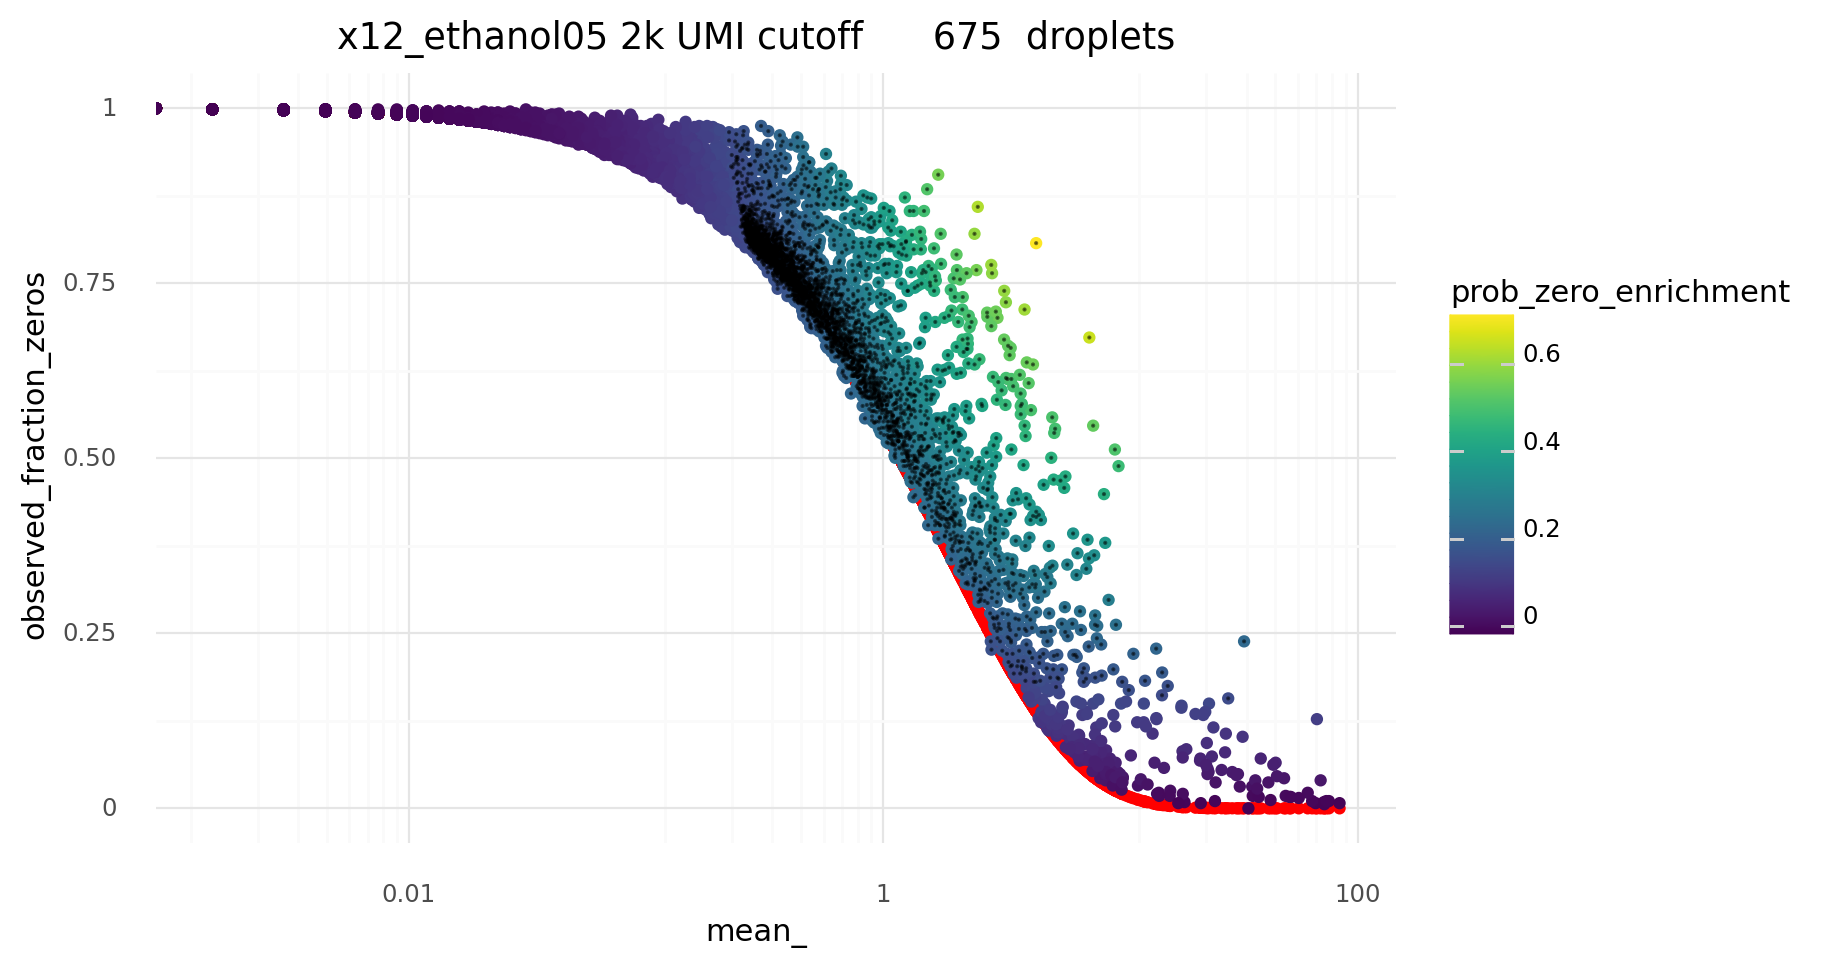

In [ ]:
for shortname in np.sort(adata.obs.shortname.unique()):
    print(f' ======================== {shortname} ==============================')

    ad = adata[adata.obs.shortname==shortname].copy()
    scvi.data.poisson_gene_selection(ad, n_samples = 20000)



    df = ad.var

    df['mean_'] = np.array(ad.X.mean(0))[0]

    p.options.figure_size = (8, 5)
    pt=(
        p.ggplot(p.aes(x='mean_', y='observed_fraction_zeros', color='prob_zero_enrichment'), df)
        + p.geom_point(p.aes(y='expected_fraction_zeros'), color='r')
        + p.geom_point()
        + p.geom_point(data=df.query('highly_variable'), shape='.', size=0.2, color='k', alpha=0.5)
        + p.scale_x_log10()
        + p.theme_minimal()
        + p.labels.ggtitle(shortname + ' 2k UMI cutoff      ' + str(len(ad.obs)) + ' ' + ' droplets')
    )
    pt.draw()